
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,21.67,49.19,37.90,17.56,17.11,13.65,8.31,18.15,37.90,2.09
1,DIA,DJIA ETF,US Stocks:Large Cap,24.63,50.99,34.72,14.30,16.81,12.13,8.35,18.44,34.72,1.88
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,26.78,40.43,43.48,25.32,25.88,19.87,12.12,19.72,43.48,2.20
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,21.83,44.55,41.23,17.70,17.39,14.23,8.79,19.02,41.23,2.17
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,30.58,19.93,59.20,12.81,15.82,21.76,13.93,25.17,59.20,2.35
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,2.37,40.92,49.15,13.06,14.12,17.68,11.59,23.37,49.15,2.10
6,IWD,Russell 1000 Value ETF,US Stocks:Value,26.50,49.56,39.07,12.68,12.21,12.58,8.20,19.69,39.07,1.98
7,IWF,Russell 1000 Growth ETF,US Stocks,15.37,43.11,38.81,22.10,21.78,17.45,10.61,19.26,38.81,2.02
8,RSP,S&P 500 Equal Weight ETF,US Stocks,26.56,55.09,44.71,16.18,15.31,13.60,8.72,21.38,44.71,2.09
9,SLY,S&P 600 Small Cap ETF,US Stocks:Small Cap,32.94,29.43,62.81,12.10,15.76,21.59,12.78,25.81,62.81,2.43


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
12,XLB,S&P500 Materials Sector ETF,US Stocks:Materials,25.18,88.83,53.63,16.36,15.53,16.10,10.52,21.02,53.63,2.55
13,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,44.67,36.67,46.07,46.07,46.07,17.29,9.46,19.52,46.07,2.36
15,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,58.06,72.64,55.38,14.21,23.35,14.12,8.56,24.12,55.38,2.30
17,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,35.97,40.56,43.14,26.68,27.84,21.20,12.58,20.44,43.14,2.11
16,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,23.12,63.52,48.30,14.12,15.72,15.90,10.18,23.46,48.30,2.06
19,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,124.24,122.72,29.31,15.65,10.75,15.00,9.04,16.28,29.31,1.80
18,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,35.32,52.57,23.36,15.82,9.01,9.79,5.54,13.68,23.36,1.71
22,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,-27.42,42.38,34.49,18.05,18.04,18.43,13.09,21.71,34.49,1.59
21,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-9.06,38.08,22.11,15.54,12.91,10.23,7.02,16.02,22.11,1.38
14,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,109.40,28.19,40.82,-4.66,0.80,27.76,15.06,40.55,40.82,1.01


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLB,XLC,XLF,XLK,XLI,XLRE,XLP,XLY,XLV,XLE,XLU,All S&P500 Sectors Portfolio
Annual Returns,53.63,46.07,55.38,43.14,48.30,29.31,23.36,34.49,22.11,40.82,11.83,35.54
Std Dev,21.02,19.52,24.12,20.44,23.46,16.28,13.68,21.71,16.02,40.55,14.95,15.58
Sharpe Ratio,2.55,2.36,2.30,2.11,2.06,1.80,1.71,1.59,1.38,1.01,0.79,2.28
Weight,0.08,0.09,0.10,0.07,0.08,0.09,0.15,0.06,0.12,0.06,0.09,1.00
Worst Typical Down Year,11.59,7.03,7.14,2.26,1.38,-3.25,-4.00,-8.93,-9.93,-40.28,-18.07,4.37
Black Swan,-9.43,-12.49,-16.98,-18.18,-22.08,-19.53,-17.68,-30.64,-25.95,-80.83,-33.02,-11.21


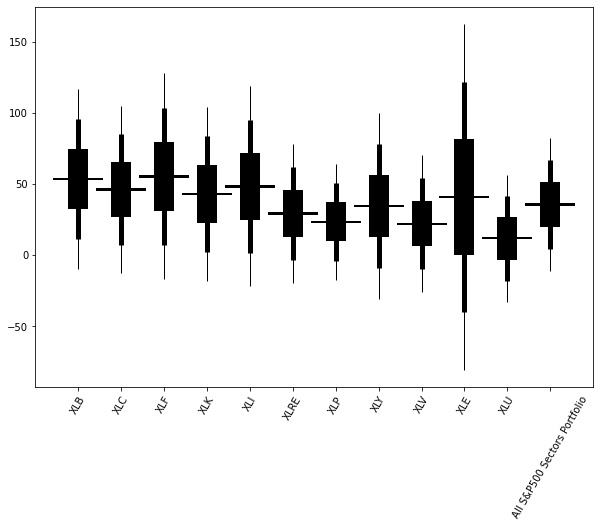

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

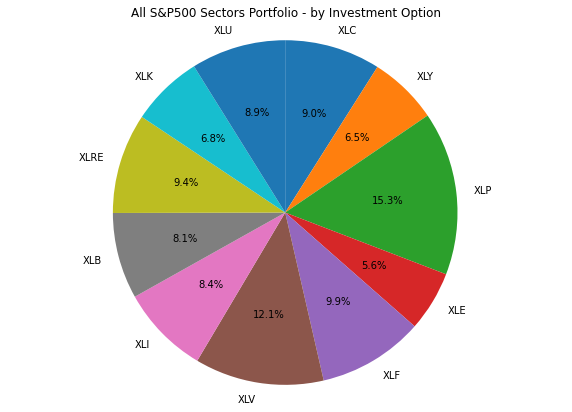

XLC    0.09
XLY    0.06
XLP    0.15
XLE    0.06
XLF    0.10
XLV    0.12
XLI    0.08
XLB    0.08
XLRE   0.09
XLK    0.07
XLU    0.09



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLB                            0.0808
    XLC                            0.0899
    XLF                            0.0993
    XLK                            0.0676
    XLI                            0.0835
    XLRE                           0.0941
    XLP                            0.1535
    XLY                            0.0650
    XLV                            0.1211
    XLE                            0.0565
    XLU                            0.0888


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...................

All S&P500 Sectors Portfolio Metrics:        
    max_sharpe_ratio                     2.68
    annual_return                       46.52
    std_dev                             17.37
    worst typical down year             11.78
    black_swan                          -5.60


All S&P500 Sectors Portfolio Weights:
    XLB                            0.1200
    XLC                            0.2400
    XLF                            0.2900
    XLK                            0.1100
    XLI                            0.1200
    XLRE                           0.0400
    XLP                            0.0000
    XLY                            0.0000
    XLV                            0.0300
    XLE                            0.0000
    XLU                            0.0500



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).